<a href="https://colab.research.google.com/github/thequickbrownfoxjumpedoverthelazydog/2022-HiMCM-Python-Models/blob/main/Python%20Models/Prophet_Year_vs_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from pandas import to_datetime
import io

In [ ]:
uploaded = files.upload()

	
df = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df = df[["Year", "Degrees C"]]

df = df.rename(columns={"Year":"ds", "Degrees C": "y"})
df = df.drop(63)
df

,ds,y
0,1959.0,0.03
1,1960.0,-0.03
2,1961.0,0.06
3,1962.0,0.03
4,1963.0,0.05
...,...,...
58,2017.0,0.92
59,2018.0,0.84
60,2019.0,0.97
61,2020.0,1.02


In [ ]:
df["year"] = df["ds"].apply(lambda x: str(x)[:4])
# print(df["year"])
df["ds"] = pd.DatetimeIndex(df["year"]+"-01"+"-01")
print(df["ds"])

0    1959-01-01
1    1960-01-01
2    1961-01-01
3    1962-01-01
4    1963-01-01
        ...    
58   2017-01-01
59   2018-01-01
60   2019-01-01
61   2020-01-01
62   2021-01-01
Name: ds, Length: 63, dtype: datetime64[ns]


In [ ]:
df = df.drop("year", axis=1)

In [ ]:
df

,ds,y
0,1959-01-01,0.03
1,1960-01-01,-0.03
2,1961-01-01,0.06
3,1962-01-01,0.03
4,1963-01-01,0.05
...,...,...
58,2017-01-01,0.92
59,2018-01-01,0.84
60,2019-01-01,0.97
61,2020-01-01,1.02


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m3s8ihn/eajmfy29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m3s8ihn/9zehg46m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68892', 'data', 'file=/tmp/tmp9m3s8ihn/eajmfy29.json', 'init=/tmp/tmp9m3s8ihn/9zehg46m.json', 'output', 'file=/tmp/tmp9m3s8ihn/prophet_modelimrectu7/prophet_model-20221116013510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:35:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=200, freq="Y")
future.tail()

,ds
258,2216-12-31
259,2217-12-31
260,2218-12-31
261,2219-12-31
262,2220-12-31


In [ ]:
predictions = model.predict(future)
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
258,2216-12-31,3.911176,3.464319,3.718299,3.906024,3.916556,-0.323056,-0.323056,-0.323056,-0.323056,-0.323056,-0.323056,0.0,0.0,0.0,3.588120
259,2217-12-31,3.928005,3.380449,3.634227,3.922813,3.933443,-0.428144,-0.428144,-0.428144,-0.428144,-0.428144,-0.428144,0.0,0.0,0.0,3.499861
260,2218-12-31,3.944834,3.266088,3.536887,3.939606,3.950331,-0.541126,-0.541126,-0.541126,-0.541126,-0.541126,-0.541126,0.0,0.0,0.0,3.403708
261,2219-12-31,3.961663,3.174969,3.434443,3.956391,3.967216,-0.661811,-0.661811,-0.661811,-0.661811,-0.661811,-0.661811,0.0,0.0,0.0,3.299852
262,2220-12-31,3.978537,3.526158,3.789037,3.973224,3.984147,-0.323056,-0.323056,-0.323056,-0.323056,-0.323056,-0.323056,0.0,0.0,0.0,3.655481


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/YEARvsTEMP.csv'
with open(path, 'w', encoding ='utf-8-sig') as f:
  predictions.to_csv(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


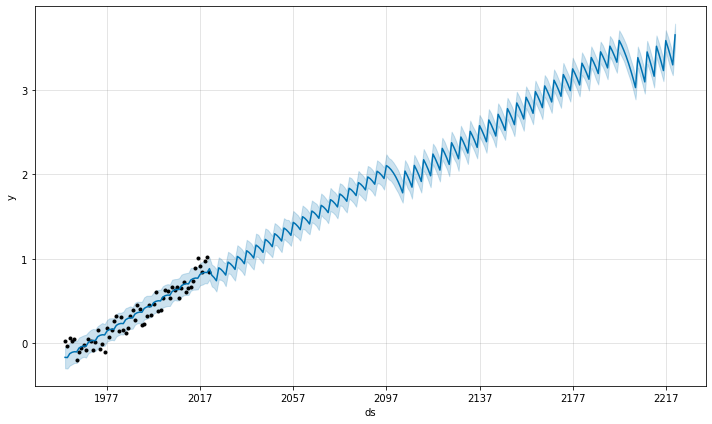

In [ ]:
fig1 = model.plot(predictions)

In [ ]:
uploaded2 = files.upload()

	
df2 = pd.read_csv(io.BytesIO(uploaded2['2022_HiMCM_Data.csv']))

df2.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data (1).csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df2 = df2[["Year", "Degrees C"]]

df2 = df2.rename(columns={"Year":"ds", "Degrees C": "y"})
df2 = df2.drop(63)
df2

,ds,y
0,1959.0,0.03
1,1960.0,-0.03
2,1961.0,0.06
3,1962.0,0.03
4,1963.0,0.05
...,...,...
58,2017.0,0.92
59,2018.0,0.84
60,2019.0,0.97
61,2020.0,1.02


In [ ]:
df2['y'] = df2['y'].rolling(3).mean()
df2

,ds,y
0,1959.0,NaN
1,1960.0,NaN
2,1961.0,0.020000
3,1962.0,0.020000
4,1963.0,0.046667
...,...,...
58,2017.0,0.940000
59,2018.0,0.923333
60,2019.0,0.910000
61,2020.0,0.943333


In [ ]:
dfavg_train = df2.drop([0, 1], axis=0)
dfavg_train

,ds,y
2,1961.0,0.020000
3,1962.0,0.020000
4,1963.0,0.046667
5,1964.0,-0.040000
6,1965.0,-0.086667
...,...,...
58,2017.0,0.940000
59,2018.0,0.923333
60,2019.0,0.910000
61,2020.0,0.943333


In [ ]:
dfavg_train["ds"] = dfavg_train["ds"].apply(lambda x: str(x)[:4])
# print(df["year"])
dfavg_train["ds"] = pd.DatetimeIndex(dfavg_train["ds"]+"-01"+"-01")
print(dfavg_train["ds"])

2    1961-01-01
3    1962-01-01
4    1963-01-01
5    1964-01-01
6    1965-01-01
        ...    
58   2017-01-01
59   2018-01-01
60   2019-01-01
61   2020-01-01
62   2021-01-01
Name: ds, Length: 61, dtype: datetime64[ns]


In [ ]:
modelavg = Prophet()
modelavg.fit(dfavg_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m3s8ihn/32gmvoar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9m3s8ihn/dvxg_47j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96385', 'data', 'file=/tmp/tmp9m3s8ihn/32gmvoar.json', 'init=/tmp/tmp9m3s8ihn/dvxg_47j.json', 'output', 'file=/tmp/tmp9m3s8ihn/prophet_modelmo40zp38/prophet_model-20221116013550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:35:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_year = modelavg.make_future_dataframe(periods=40, freq="Y")
future_year.tail()

,ds
96,2056-12-31
97,2057-12-31
98,2058-12-31
99,2059-12-31
100,2060-12-31


In [ ]:
forecast2 = modelavg.predict(future_year)
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,-0.119238,-0.215540,-0.052049,-0.119238,-0.119238,-0.014067,-0.014067,-0.014067,-0.014067,-0.014067,-0.014067,0.0,0.0,0.0,-0.133305
1,1962-01-01,-0.104233,-0.196845,-0.034789,-0.104233,-0.104233,-0.012335,-0.012335,-0.012335,-0.012335,-0.012335,-0.012335,0.0,0.0,0.0,-0.116569
2,1963-01-01,-0.089228,-0.183601,-0.026821,-0.089228,-0.089228,-0.012996,-0.012996,-0.012996,-0.012996,-0.012996,-0.012996,0.0,0.0,0.0,-0.102224
3,1964-01-01,-0.074223,-0.176015,-0.007958,-0.074223,-0.074223,-0.016048,-0.016048,-0.016048,-0.016048,-0.016048,-0.016048,0.0,0.0,0.0,-0.090271
4,1965-01-01,-0.059177,-0.155580,0.008366,-0.059177,-0.059177,-0.014067,-0.014067,-0.014067,-0.014067,-0.014067,-0.014067,0.0,0.0,0.0,-0.073243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2056-12-31,1.612433,1.506717,1.678491,1.586987,1.637234,-0.021491,-0.021491,-0.021491,-0.021491,-0.021491,-0.021491,0.0,0.0,0.0,1.590942
97,2057-12-31,1.631971,1.514384,1.687186,1.605615,1.657953,-0.029316,-0.029316,-0.029316,-0.029316,-0.029316,-0.029316,0.0,0.0,0.0,1.602655
98,2058-12-31,1.651510,1.522542,1.700378,1.623897,1.678261,-0.039513,-0.039513,-0.039513,-0.039513,-0.039513,-0.039513,0.0,0.0,0.0,1.611997
99,2059-12-31,1.671048,1.530799,1.703357,1.642654,1.698908,-0.052066,-0.052066,-0.052066,-0.052066,-0.052066,-0.052066,0.0,0.0,0.0,1.618982


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(dfavg_train.y, forecast2.yhat)

ValueError: ignored

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/YEARvsTEMPRolling.csv'
with open(path, 'w', encoding ='utf-8-sig') as f:
  forecast2.to_csv(f)

NameError: ignored

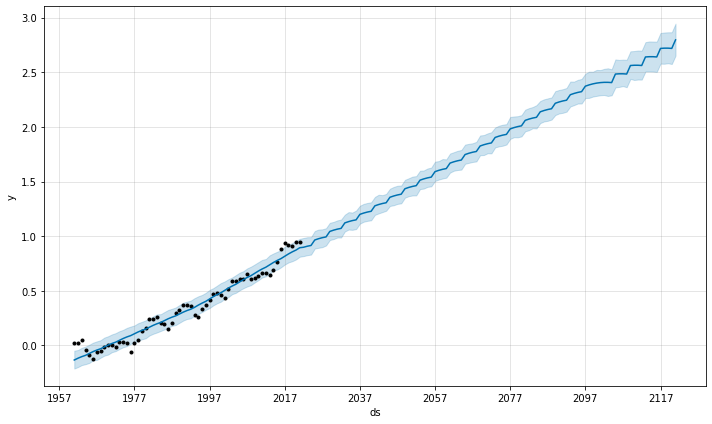

In [ ]:
fig1 = modelavg.plot(forecast2)

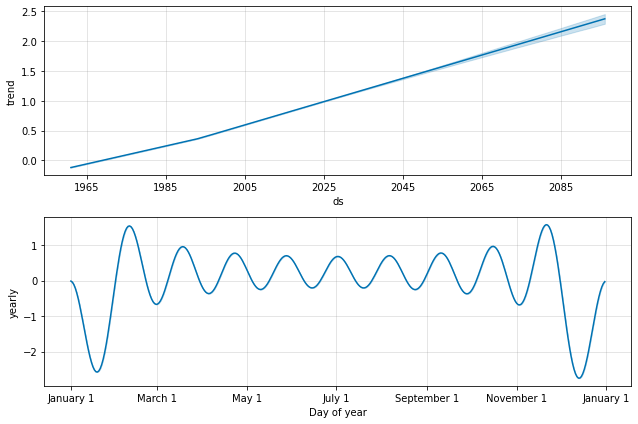

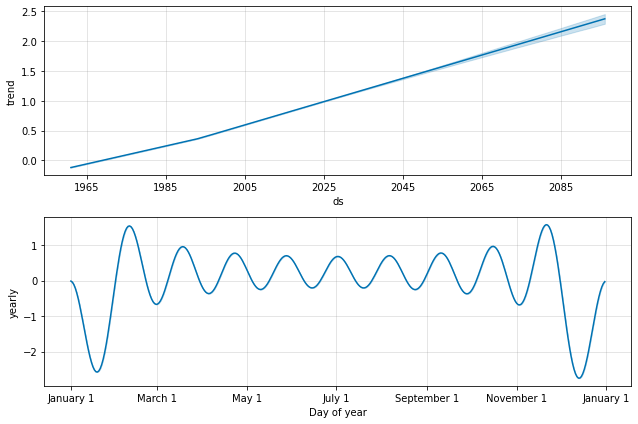

In [ ]:
modelavg.plot_components(forecast2)